# Exercise 9 - Linear Discriminant Analysis and interactive plots

In [1]:
import pandas as pd
import os

df = pd.read_csv(os.getcwd() + '\..\..\Examples\EFIplus_medit.zip', compression='zip', sep=";")

## 9.1 - LDA
- Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous exercises), using the Douro, Tejo, Mondego and Minho basins as the pre-determined groups.
- Produce a biplot with ‘Catchment_name’ as a grouping variable. 


*Step 0 - Subset the dataframe to select the data of interest:*

In [2]:
# subset the df
df = df[(df['Catchment_name'] == 'Tejo') | (df['Catchment_name'] == "Douro")| (df['Catchment_name'] == "Mondego") | (df['Catchment_name'] == "Minho")]
columns = ['Catchment_name', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]
df = df.dropna()
df = df.reset_index(drop = True)
df.head()

,Catchment_name,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,Tejo,1253,13.406,1603.519424,640.327779,9.3,0.6,18.9
1,Tejo,1155,9.398,1578.678579,633.238847,10.1,1.2,19.6
2,Tejo,1074,8.186,1553.219128,625.841858,10.1,1.2,19.5
3,Tejo,1018,11.736,1539.684999,622.111415,10.3,1.7,20.0
4,Tejo,979,2.670,1493.914010,608.146170,10.6,1.8,20.2


*Step 1 - Standardize the data:*

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cols_to_standardize = df.columns[1:]
ct = ColumnTransformer(transformers=[
    ('standardize', StandardScaler(), cols_to_standardize)],
remainder='passthrough' # Keep the remaining columns unchanged
)  
transformed_data = ct.fit_transform(df)
dft = pd.DataFrame(transformed_data,
                   columns= df.columns[1:].append(df.columns[:1]) #adjust the column index as untransf. col was moved to end
)
dft.head()

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,Catchment_name
0,2.125767,-0.074603,1.801357,-1.082627,-1.654765,-1.930847,-0.766044,Tejo
1,1.832393,-0.275873,1.73858,-1.107775,-1.287215,-1.697619,-0.461021,Tejo
2,1.58991,-0.336736,1.674239,-1.134016,-1.287215,-1.697619,-0.504595,Tejo
3,1.422268,-0.158465,1.640036,-1.14725,-1.195328,-1.503263,-0.286722,Tejo
4,1.305517,-0.613732,1.524365,-1.196791,-1.057497,-1.464392,-0.199573,Tejo


*Step 2.a - Run the LDA for 2 components:*

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define predictor and response
X = dft[dft.columns[:-1]]
y = dft['Catchment_name'] # 4 classes

#Fit the LDA model
lda2 = LinearDiscriminantAnalysis(n_components=2)
X_projected_2 = lda2.fit_transform(X, y)

*Step 3.a - Produce the bi-plot:*

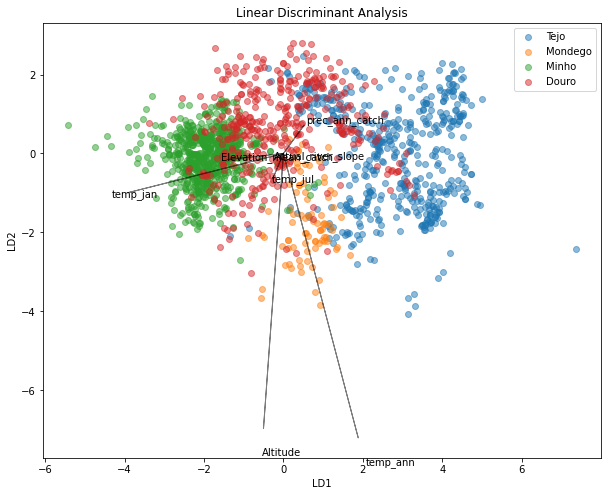

In [5]:
import matplotlib.pyplot as plt

# scatter plot of the projected data
plt.figure(figsize=(10, 8))
for cname in set(y):
    plt.scatter(X_projected_2[y == cname, 0], X_projected_2[y == cname, 1], label=cname, alpha=.5)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear Discriminant Analysis')

# Add arrows
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, lda2.coef_[0, i], lda2.coef_[1, i], color='black', alpha=0.5)
    plt.text(lda2.coef_[0, i] * 1.1, lda2.coef_[1, i] * 1.1, feature, color='black')

plt.legend()
plt.show()

*Step 2.b and 3.b - run LDA for 3 components and produce a 3-dim. biplot:*

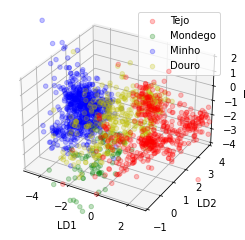

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define predictor and response
X = dft[dft.columns[:-1]]
y = dft['Catchment_name'] # 4 classes

#Fit the LDA model
lda3 = LinearDiscriminantAnalysis() # 4-1=3 components
X_projected_3 = lda3.fit_transform(X, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
colors = ['r', 'g', 'b', 'y']  # Assign colors for different classes
for cname, color in zip(set(y), colors):
    indices = y == cname
    ax.scatter(X_projected_3[indices, 0], X_projected_3[indices, 1], X_projected_3[indices, 2], c=color, label=cname, alpha=.25)

# Add labels and legend
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.legend()

# Set limits for better visibility of arrows
ax.set_xlim([-5, 3])
ax.set_ylim([-1, 4])
ax.set_zlim([-4, 2])

# Show the plot
plt.show()

## 9.2 - Interactive Plot
Try to build interactive plots that display data in the space defined by the Discriminant Functions.


*Interactive bi-plot:*

In [17]:
import plotly.express as px

# Convert the projected data to a DataFrame
df_projected = pd.DataFrame(X_projected_2, columns=['LD 1', 'LD 2'])
df_projected['Catchment_name'] = y

# Create an interactive scatter plot
fig = px.scatter(df_projected, x='LD 1', y='LD 2',
                 color='Catchment_name',
                 title='Interactive Bi-plot of space defined by Discriminant Functions',
                 hover_data=['Catchment_name'])

# Add axis labels
fig.update_xaxes(title_text='LD 1')
fig.update_yaxes(title_text='LD 2')

# Show the plot
fig.show()

*Interactive 3-dim. plot:*

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter3d(
        x=X_projected_3[y == cname, 0],
        y=X_projected_3[y == cname, 1],
        z=X_projected_3[y == cname, 2],
        mode='markers',
        name=cname,
        marker=dict(
            opacity=0.2
        )
    ) for cname in set(y)
])

fig.update_layout(
    title='Interactive 3D-Plot of space defined by Discriminant Functions',
    scene=dict(
        xaxis_title='LD1',
        yaxis_title='LD2',
        zaxis_title='LD3'
    )
)

# Enable zooming and panning
fig.update_layout(scene_camera=dict(
    eye=dict(x=1.2, y=1.2, z=0.6)
))
fig.update_layout(dragmode='orbit', hovermode='closest')

fig.show()


In [22]:
px.scatter?


Signature:
px.scatter(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    symbol_sequence=None,
    symbol_map=None,
    opacity=None,
    size_max=None,
    marginal_x=None,
    marginal_y=None,
    trendline=None,
    trendline_options=None,
    trendline_color_override=None,
    trendline_scope='trace',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    render_mode='auto',
